##  About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

* Business Problem

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

* Dataset

Link: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

(After clicking on the above link, you can download the files by right-clicking on the page and clicking on "Save As", then naming the file as per your wish, with .csv as the extension.)

The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

    Show_id: Unique ID for every Movie / Tv Show
    Type: Identifier - A Movie or TV Show
    Title: Title of the Movie / Tv Show
    Director: Director of the Movie
    Cast: Actors involved in the movie/show
    Country: Country where the movie/show was produced
    Date_added: Date it was added on Netflix
    Release_year: Actual Release year of the movie/show
    Rating: TV Rating of the movie/show
    Duration: Total Duration - in minutes or number of seasons
    Listed_in: Genre
    Description: The summary description

# What we will do:

* Comparison of tv shows vs. movies.
* What is the best time to launch a TV show?
* Analysis of actors/directors of different types of shows/movies.
* Does Netflix has more focus on TV Shows than movies in recent years
* Understanding what content is available in different countries

In [319]:
# Dependencies: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data cleaning / Sanity Check

In [320]:
df = pd.read_csv('netflix.csv')

In [321]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


# Observation:

After seeing the datawe came across few issues that we need to take care before procedding with the analysis
-  check for the null values and best practice to impute the nulls
-  unnesting of nested columns (columns with the multiple values)
-  2 types of date format are used here
-  for duration columns value varies with the type of content (for movies its mins and for series its season)

In [322]:
# check the value status for the df using info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [323]:
# remove white spaces in the start and end of the elements of string columns
df['title'] = df['title'].str.strip()
df['director'] = df['director'].str.strip()
df['cast'] = df['cast'].str.strip()
df['country'] = df['country'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()
df['date_added'] = df['date_added'].str.strip()

In [324]:
def parse_dates(date_str):
    formats = [
        '%d-%b-%y',
        '%B %d, %Y'
    ]
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt, errors='raise')
        except (ValueError, TypeError):
            continue
    return pd.NaT

# Apply the function to the 'date_added' column
df['date_added'] = df['date_added'].apply(parse_dates)

In [325]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [327]:
df.to_csv('datecheck.csv')

In [328]:

# Handle missing values: fill with 'Unknown' for simplicity in other columns
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['duration'].fillna('Unknown', inplace=True)

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\1868786555.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\1868786555.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [329]:
df.info()
df['date_added'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


10

In [330]:
df['date_added'].dt.year

0       2021.0
1       2021.0
2       2021.0
3       2021.0
4       2021.0
         ...  
8802    2019.0
8803    2019.0
8804    2019.0
8805    2020.0
8806    2019.0
Name: date_added, Length: 8807, dtype: float64

In [331]:
# Fill missing values in 'rating' column with mode
rating_mode = df['rating'].mode()[0]
df['rating'].fillna(rating_mode, inplace=True)

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\253231911.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].fillna(rating_mode, inplace=True)


In [332]:
# for few analysis separate movies and TV shows
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

In [333]:
'''
Fill missing values in 'duration' column
For movies, replace missing durations with the mean duration
For TV shows, replace missing durations with the mode duration
'''
# Replace 'Unknown' with np.nan
movies_df['duration'] = movies_df['duration'].replace('Unknown', np.nan)

# Extract numeric part from the duration strings
movies_df['duration_value'] = movies_df['duration'].str.split().str[0].astype(float)


# Calculate the mean duration, excluding NaN values
duration_mean_movie = movies_df['duration_value'].mean()

# Fill NaN values with the mean duration
movies_df['duration_value'].fillna(duration_mean_movie, inplace=True)

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\862902501.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration'] = movies_df['duration'].replace('Unknown', np.nan)
C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\862902501.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration_value'] = movies_df['duration'].str.split().str[0].astype(float)
C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\862902501.py:17: FutureWarning: A value is trying to be set on a copy of a Data

In [334]:
# Replace 'Unknown' with np.nan
tv_shows_df['duration'] = tv_shows_df['duration'].replace('Unknown', np.nan)

# Calculate the mode of the duration, excluding NaN values
duration_mode_tv = tv_shows_df['duration'].mode()[0]

# Fill NaN values with the mode duration
tv_shows_df['duration'].fillna(duration_mode_tv, inplace=True)

# Extract numeric part from the duration strings and convert to integer
tv_shows_df['duration_value'] = tv_shows_df['duration'].str.split().str[0]

# Convert the extracted numeric values to integer, handling any conversion issues
tv_shows_df['duration_value'] = pd.to_numeric(tv_shows_df['duration_value'], errors='coerce').astype('Int64')


C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\3653445223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['duration'] = tv_shows_df['duration'].replace('Unknown', np.nan)
C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\3653445223.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the origin

In [335]:
# Ensure the 'duration_value' column is now integer type
print(tv_shows_df['duration_value'].sum())
print(movies_df['duration_value'].sum())

4723
610507.7315600523


In [336]:
movies_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0


In [337]:
tv_shows_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2


In [338]:
# Combine the data back together
df = pd.concat([movies_df, tv_shows_df])

In [339]:
# crosscheck
df['duration_value'].sum()

615230.7315600523

In [340]:
round(df.describe(),0)

,date_added,release_year,duration_value
count,8797,8807.0,8807.0
mean,2019-05-17 05:59:08.436967168,2014.0,70.0
min,2008-01-01 00:00:00,1925.0,1.0
25%,2018-04-06 00:00:00,2013.0,2.0
50%,2019-07-02 00:00:00,2017.0,88.0
75%,2020-08-19 00:00:00,2019.0,106.0
max,2021-09-25 00:00:00,2021.0,312.0
std,NaN,9.0,51.0


In [341]:
# Unnest the 'listed_in' column
df = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

# Unnest the 'cast' column
df = df.assign(cast=df['cast'].str.split(', ')).explode('cast')

# Unnest the 'director' column
df = df.assign(director=df['director'].str.split(', ')).explode('director')

# Unnest the 'country' column
df = df.assign(country=df['country'].str.split(', ')).explode('country')

# Display cleaned and unnested data
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0


In [342]:
# Remove trailing commas from all string values in the DataFrame
df = df.applymap(lambda x: x.rstrip(',') if isinstance(x, str) else x)

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\302504772.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.rstrip(',') if isinstance(x, str) else x)


In [343]:
# remove white spaces in the start and end of the elements of string columns
df['title'] = df['title'].str.strip()
df['director'] = df['director'].str.strip()
df['cast'] = df['cast'].str.strip()
df['country'] = df['country'].str.strip()
df['listed_in'] = df['listed_in'].str.strip()

In [344]:
df.head(1)
df = df.drop('duration', axis = 1)

In [345]:
# For easy analysis add some values for date time
df['month_added'] = df['date_added'].dt.strftime('%b')
df['year_added'] = df['date_added'].dt.strftime('%Y')
df['day_added'] = df['date_added'].dt.day

In [346]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration_value,month_added,year_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,Sep,2021,25.0
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown,2021-09-24,2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,Sep,2021,24.0


In [347]:
df = df.rename(columns= {'duration_value': 'duration'})
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,duration,month_added,year_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm...",90.0,Sep,2021,25.0
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown,2021-09-24,2021,PG,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91.0,Sep,2021,24.0


In [348]:
df = df[['show_id','type','title','date_added','release_year','rating',	'duration', 'description','director','cast','country','listed_in',	'month_added',	'year_added',	'day_added']]

In [349]:
df.head(2)

,show_id,type,title,date_added,release_year,rating,duration,description,director,cast,country,listed_in,month_added,year_added,day_added
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90.0,"As her father nears the end of his life, filmm...",Kirsten Johnson,Unknown,United States,Documentaries,Sep,2021,25.0
6,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...,Robert Cullen,Vanessa Hudgens,Unknown,Children & Family Movies,Sep,2021,24.0


In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201991 entries, 0 to 8803
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201991 non-null  object        
 1   type          201991 non-null  object        
 2   title         201991 non-null  object        
 3   date_added    201833 non-null  datetime64[ns]
 4   release_year  201991 non-null  int64         
 5   rating        201991 non-null  object        
 6   duration      201991 non-null  float64       
 7   description   201991 non-null  object        
 8   director      201991 non-null  object        
 9   cast          201991 non-null  object        
 10  country       201991 non-null  object        
 11  listed_in     201991 non-null  object        
 12  month_added   201833 non-null  object        
 13  year_added    201833 non-null  object        
 14  day_added     201833 non-null  float64       
dtypes: datetime64[ns](1), fl

> With this the data cleaning part is almost done and now we can start the EDA

In [351]:
df.head(100)

,show_id,type,title,date_added,release_year,rating,duration,description,director,cast,country,listed_in,month_added,year_added,day_added
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90.0,"As her father nears the end of his life, filmm...",Kirsten Johnson,Unknown,United States,Documentaries,Sep,2021,25.0
6,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...,Robert Cullen,Vanessa Hudgens,Unknown,Children & Family Movies,Sep,2021,24.0
6,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...,José Luis Ucha,Vanessa Hudgens,Unknown,Children & Family Movies,Sep,2021,24.0
6,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...,Robert Cullen,Kimiko Glenn,Unknown,Children & Family Movies,Sep,2021,24.0
6,s7,Movie,My Little Pony: A New Generation,2021-09-24,2021,PG,91.0,Equestria's divided. But a bright-eyed hero be...,José Luis Ucha,Kimiko Glenn,Unknown,Children & Family Movies,Sep,2021,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125.0,"On a photo shoot in Ghana, an American model s...",Haile Gerima,Mutabaruka,Burkina Faso,Independent Movies,Sep,2021,24.0
7,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125.0,"On a photo shoot in Ghana, an American model s...",Haile Gerima,Mutabaruka,United Kingdom,Independent Movies,Sep,2021,24.0
7,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125.0,"On a photo shoot in Ghana, an American model s...",Haile Gerima,Mutabaruka,Germany,Independent Movies,Sep,2021,24.0
7,s8,Movie,Sankofa,2021-09-24,1993,TV-MA,125.0,"On a photo shoot in Ghana, an American model s...",Haile Gerima,Mutabaruka,Ethiopia,Independent Movies,Sep,2021,24.0


## Defining Problem Statement and Analysing basic metrics

In [352]:
# Content Type Distribution: Determine the number of movies and TV shows.
df.head()
df.groupby(['type'])['title'].nunique().reset_index(name = 'count')

,type,count
0,Movie,6130
1,TV Show,2676


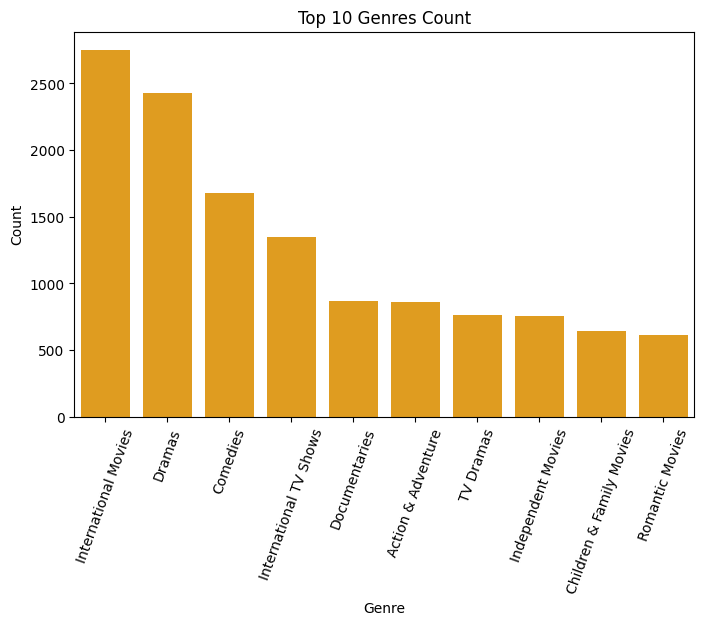

In [353]:
# Genre Distribution: Analyze the genres listed and their frequencies.
# Top 10 Genre
top_10_genre = df.groupby(['listed_in'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(data=top_10_genre, x='listed_in', y='count', color= 'orange')
plt.xticks(rotation=70)  # Optional: Rotate x-axis labels if they are long
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Genres Count')
plt.show()


# Observation:
> Top genres that are majority in counts are "International Movies","dramas" and "comedy", which favours the descision of adding new content which is of the top genres will be possible

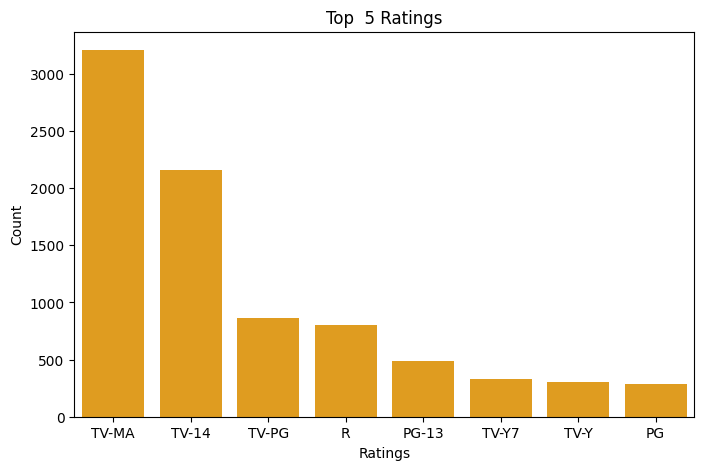

In [354]:
# Rating Distribution: Examine the distribution of content ratings (e.g., PG-13, TV-MA).

top_5_rating = df.groupby(['rating'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False).head(8)
plt.figure(figsize=(8, 5))
sns.barplot(data=top_5_rating, x = 'rating', y = 'count', color= 'orange')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Top  5 Ratings')
plt.show()

# Observation:
> TV-MA and TV-14 are the frequent ratings, for adding content on Netflix So with this we can suggest the content with the top 3 genres and top 3 ratings are most favoured

In [355]:
# Duration Analysis: For movies, analyze the distribution of durations. For TV shows, analyze the number of seasons.

movies = df[df['type'] == 'Movie']
movie_mean = movies['duration'].mean()
tv_show = df[df['type'] == 'TV Show']
mode_season = tv_show['duration'].mode()
print(f" average length of movies added are {movie_mean//60} hours and {movie_mean%60} mins.")
print(f" modal length of TV shows in terms of seasons is {mode_season[0]}")


 average length of movies added are 1.0 hours and 46.856302541500455 mins.
 modal length of TV shows in terms of seasons is 1.0


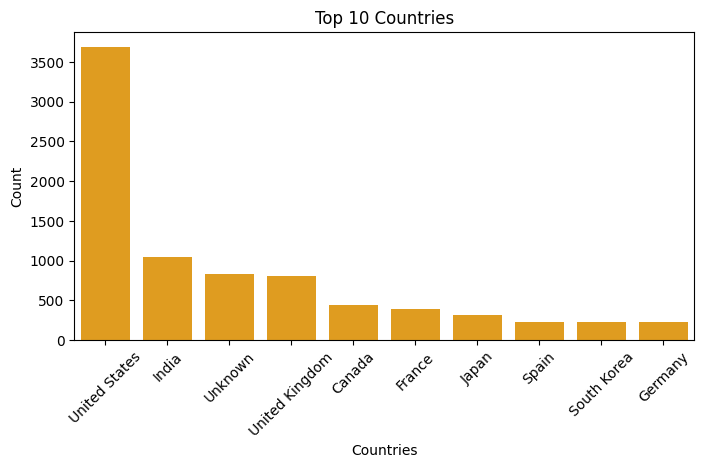

In [356]:
# Geographical Distribution: Identify the countries represented in the dataset and the number of entries from each country.

top_countries = df.groupby(['country'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False).head(10)
plt.figure(figsize=(8, 4))
sns.barplot(data = top_countries, x = 'country', y = 'count', color= 'orange')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Top 10 Countries')
plt.xticks(rotation=45) 
plt.show()

# Observation:

> mostly the TV shows that are added in Netflix are from US and India.

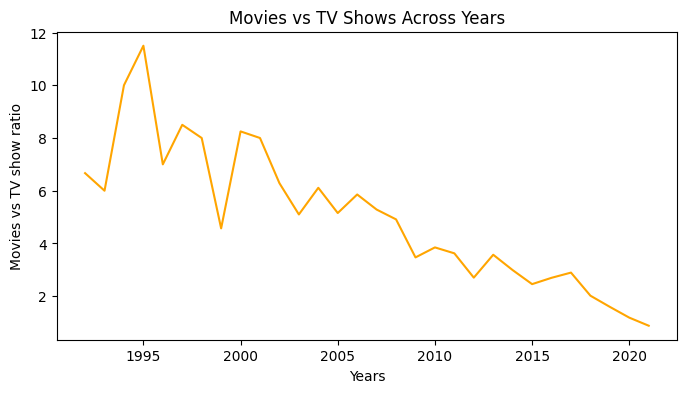

In [357]:
# Yearly Release Trend: Analyze the number of releases per year.
No_movies_Show_per_year = df.groupby(['release_year', 'type'])['title'].nunique().reset_index()
movieshows_per_year= No_movies_Show_per_year.pivot_table(index='release_year', columns = 'type').reset_index().sort_index(ascending= False)
movieshows_per_year['movie_show_ratio'] = movieshows_per_year[('title', 'Movie')]/ movieshows_per_year[('title', 'TV Show')]
movieshows_per_year= movieshows_per_year.head(30)
plt.figure(figsize=(8, 4))
sns.lineplot(data = movieshows_per_year, x = 'release_year', y = 'movie_show_ratio', color = 'orange')
plt.xlabel('Years')
plt.ylabel('Movies vs TV show ratio')
plt.title('Movies vs TV Shows Across Years')
plt.show()

# Observation: 

* If we calculate the ratio of no of movies vs TV shows addition per year that will help us to understand the trend of adding movies vs TV shows 

* Its interesting to see that the movies vs TV shaow ratio is on declining trnd in last 30 years e.i., the no of movies produced per year are declining if we compared with the no of TV shows.

* TV show share is increasing vs Movies

#  Director and Cast Analysis: 

In [358]:
# Determine the most frequent directors and cast members.

top_director = df.groupby(['director'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False).head(10)
top_cast = df.groupby(['cast'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False).head(10)

# Modified df to pair the actor_director
df['dir_cast'] = df['director'] + " _ " + df['cast']
top_pair = df.groupby(['dir_cast'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False).head(10)

# Top directors that are with high counts of movies
top_director

,director,count
4744,Unknown,2634
3749,Rajiv Chilaka,22
1906,Jan Suter,21
3800,Raúl Campos,19
2866,Marcus Raboy,16
4457,Suhas Kadav,16
1954,Jay Karas,15
755,Cathy Garcia-Molina,13
1951,Jay Chapman,12
2945,Martin Scorsese,12


In [359]:
# top 10 actors in terms of no of movies
top_cast

,cast,count
34214,Unknown,825
2832,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
32591,Takahiro Sakurai,32
24215,Naseeruddin Shah,32
28974,Rupa Bhimani,31
845,Akshay Kumar,30
25424,Om Puri,30
35881,Yuki Kaji,29


# Observation: 
> Top 10 director-actor pairs (to know which actor/directors having close affinity) in terms of no of movies : If we saw the top considerable pairs for the director_actors, then Rajiv Chilaka and Rajesh Kava and Julie Tejwani are in top, in terms of movies count. Which means they have the preference over the each other

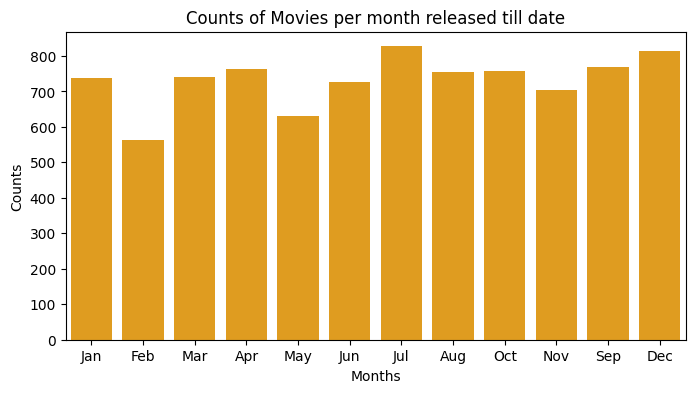

In [360]:
# Date Added: Explore the trend of when content was added to the platform.

# Whcih month is best/popular to add movie/TV show:

No_movies_per_month = df.groupby(['month_added'])['title'].nunique().reset_index(name = 'count')

# Convert 'month_added' to categorical with desired order

month_order = ['Jan', 'Feb','Mar','Apr', 'May', 'Jun','Jul','Aug', 'Oct','Nov','Sep','Dec']
No_movies_per_month['month_added'] = pd.Categorical(No_movies_per_month['month_added'], categories=month_order, ordered=True)

plt.figure(figsize=(8, 4))
composit_month = sns.barplot(data= No_movies_per_month, x= 'month_added', y = 'count', color= 'orange')
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('Counts of Movies per month released till date')
plt.show()

# Observation: 

> Using below generally we can cnclude that the conntetn addition is majorly favoured in the months of Jul  followed by Dec


In [361]:
# a.	Observations on the Shape of Data:
# What are the dimensions of the dataset (number of rows and columns)?
df.shape

print(f"df has the {df.shape[0]} number of rows and {df.shape[1]} number of columns for analysis")

df has the 201991 number of rows and 16 number of columns for analysis


In [362]:
# Are there any duplicated rows that need to be removed?
all_duplicates = df[df.duplicated(keep=False)]


# if there are the duplicates then: keep first
df = df.drop_duplicates(keep= 'first').reset_index()

In [363]:
# Check if still duplicates are there:
all_duplicates = df[df.duplicated(keep=False)]
all_duplicates

'''
No duplicates present
'''

'\nNo duplicates present\n'

In [364]:
# b.Data Types of All Attributes:
# What are the data types of each column in the dataset?
df.info()

'''
All the columns are in respective data types like 'date_added' as "datetime", 'release_year' as nmerical data tyoe
and duration as 'float'.

'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201936 entries, 0 to 201935
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         201936 non-null  int64         
 1   show_id       201936 non-null  object        
 2   type          201936 non-null  object        
 3   title         201936 non-null  object        
 4   date_added    201778 non-null  datetime64[ns]
 5   release_year  201936 non-null  int64         
 6   rating        201936 non-null  object        
 7   duration      201936 non-null  float64       
 8   description   201936 non-null  object        
 9   director      201936 non-null  object        
 10  cast          201936 non-null  object        
 11  country       201936 non-null  object        
 12  listed_in     201936 non-null  object        
 13  month_added   201778 non-null  object        
 14  year_added    201778 non-null  object        
 15  day_added     201

'\nAll the columns are in respective data types like \'date_added\' as "datetime", \'release_year\' as nmerical data tyoe\nand duration as \'float\'.\n\n'

In [365]:
# C.Conversion of Categorical Attributes to 'category':
# type and rating columns from the df are kind of categorical values, also we can add country too, which will 
# improve our space optimisations

# Convert categorical columns to 'category' data type
categorical_columns = ['type', 'rating', 'director', 'country', 'listed_in', 'month_added']

for column in categorical_columns:
    df[column] = df[column].astype('category')

# Display the DataFrame info to check the data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201936 entries, 0 to 201935
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         201936 non-null  int64         
 1   show_id       201936 non-null  object        
 2   type          201936 non-null  category      
 3   title         201936 non-null  object        
 4   date_added    201778 non-null  datetime64[ns]
 5   release_year  201936 non-null  int64         
 6   rating        201936 non-null  category      
 7   duration      201936 non-null  float64       
 8   description   201936 non-null  object        
 9   director      201936 non-null  category      
 10  cast          201936 non-null  object        
 11  country       201936 non-null  category      
 12  listed_in     201936 non-null  category      
 13  month_added   201778 non-null  category      
 14  year_added    201778 non-null  object        
 15  day_added     201

In [366]:
# d.Missing Value Detection:

null_share =df.isnull().sum()
null_share


index             0
show_id           0
type              0
title             0
date_added      158
release_year      0
rating            0
duration          0
description       0
director          0
cast              0
country           0
listed_in         0
month_added     158
year_added      158
day_added       158
dir_cast          0
dtype: int64

* major share of null is in directors, which will not impact much on to the analysis of the data, while rest all are already treated like:
    -  RATING HAS BEEN TREATED WITH THE MODE ValueError
    -  COUNTRY IS TREATED WITH THE 'United States' as the data is from US
    -  duration is treated with the mean for movies and mode for the TV show

In [367]:
# e.Statistical Summary:
# What are the basic statistics (mean, median, mode, standard deviation, etc.) for numerical columns?

round(df.describe(), 1)

,index,date_added,release_year,duration,day_added
count,201936.0,201778,201936.0,201936.0,201778.0
mean,4372.9,2019-06-19 10:34:02.839160064,2013.5,77.7,12.2
min,0.0,2008-01-01 00:00:00,1925.0,1.0,1.0
25%,2121.0,2018-06-24 00:00:00,2012.0,4.0,1.0
50%,4332.0,2019-09-01 00:00:00,2016.0,95.0,12.0
75%,6678.0,2020-09-10 00:00:00,2019.0,112.0,20.0
max,8806.0,2021-09-25 00:00:00,2021.0,312.0,31.0
std,2592.9,NaN,9.0,51.5,9.8


# Observation: 

> duration column is showing the 312mins as duration for the movies which seems to be the outlier for the column

In [368]:
# What is the distribution of categorical data (frequency counts for each category)?
object_description = df.describe(include=[object])
object_description

,show_id,title,description,cast,year_added,dir_cast
count,201936,201936,201936,201936,201778,201936
unique,8807,8806,8775,36440,14,62741
top,s7165,Kahlil Gibran's The Prophet,A troubled young girl and her mother find sola...,Unknown,2019,Unknown _ Unknown
freq,700,700,700,2146,46916,738


In [369]:
# What are the most common and least common values in each categorical column?
for column in df.select_dtypes(include=[object]).columns:
    value_counts = df[column].value_counts()
    most_common = value_counts.idxmax()
    most_common_count = value_counts.max()
    least_common = value_counts.idxmin()
    least_common_count = value_counts.min()
    print(f"Column: {column}")
    print(f"  Most common value: {most_common} (count: {most_common_count})")
    print(f"  Least common value: {least_common} (count: {least_common_count})")
    print()

Column: show_id
  Most common value: s7165 (count: 700)
  Least common value: s3694 (count: 1)

Column: title
  Most common value: Kahlil Gibran's The Prophet (count: 700)
  Least common value: Katherine Ryan: Glitter Room (count: 1)

Column: description
  Most common value: A troubled young girl and her mother find solace on a journey with a subversive poet whose words captivate their hearts and imaginations. (count: 700)
  Least common value: Stand-up comedian Colin Quinn calls out the hypocrisies of the left and the right in this special based on his politically charged Off-Broadway show. (count: 1)

Column: cast
  Most common value: Unknown (count: 2146)
  Least common value: Matt Shively (count: 1)

Column: year_added
  Most common value: 2019 (count: 46916)
  Least common value: 2008 (count: 19)

Column: dir_cast
  Most common value: Unknown _ Unknown (count: 738)
  Least common value: Chris Stokes _ Anton Peeples (count: 1)



In [370]:
# How many movies and TV shows are there?

movies_count= movies['title'].nunique()
show_count = tv_show['title'].nunique()

print(f"total number of movies that are there in df are {movies_count} and total number of showas are around {show_count} so total we have {movies_count + show_count} elements")

total number of movies that are there in df are 6130 and total number of showas are around 2676 so total we have 8806 elements


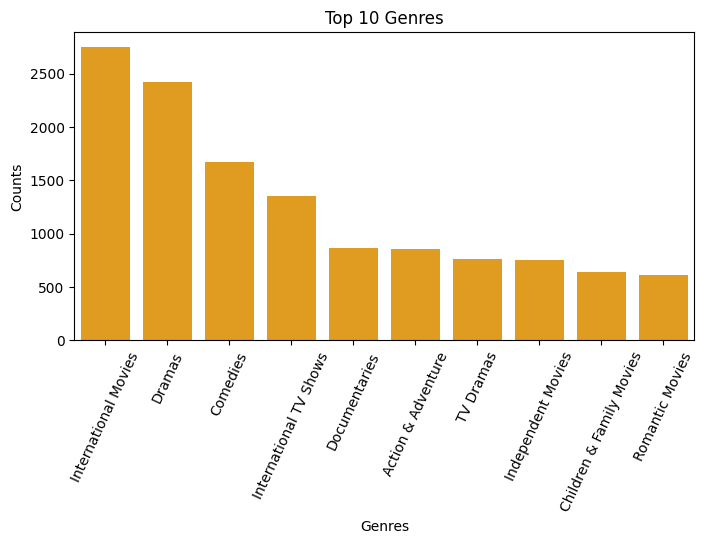

In [371]:
# What are the most frequent genres?

plt.figure(figsize=(8, 4))
sns.barplot(data=top_10_genre, x = 'listed_in', y = 'count', color= 'orange')
plt.xlabel('Genres')
plt.ylabel('Counts')
plt.title('Top 10 Genres')
plt.xticks(rotation = 65)
plt.show()

> International movies, drama and comedies are top consumed materials

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\2184506117.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_rating = df.groupby(['rating'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False).head()


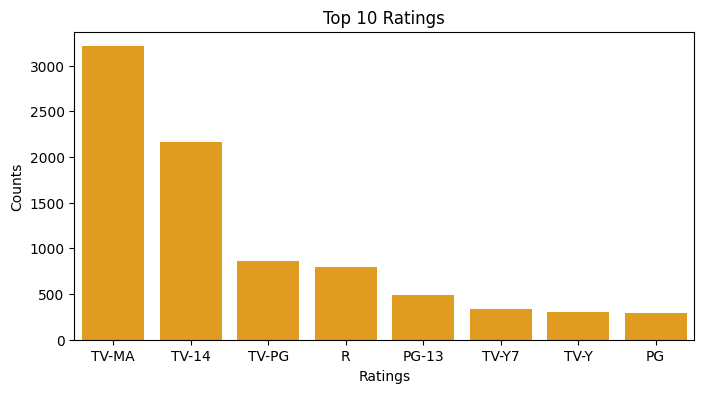

In [372]:
# What are the most common ratings assigned to the content?

top_rating = df.groupby(['rating'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False).head()
plt.figure(figsize=(8, 4))
sns.barplot(data=top_5_rating, x = 'rating', y = 'count', color= 'orange')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.title('Top 10 Ratings')
plt.xticks(rotation = 0)
plt.show()

> TV-MA is the most frequent rating given to the added content

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\654365514.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_countries = df.groupby(['country'])['title'].nunique().reset_index(name='count').sort_values('count', ascending=False).head(10)


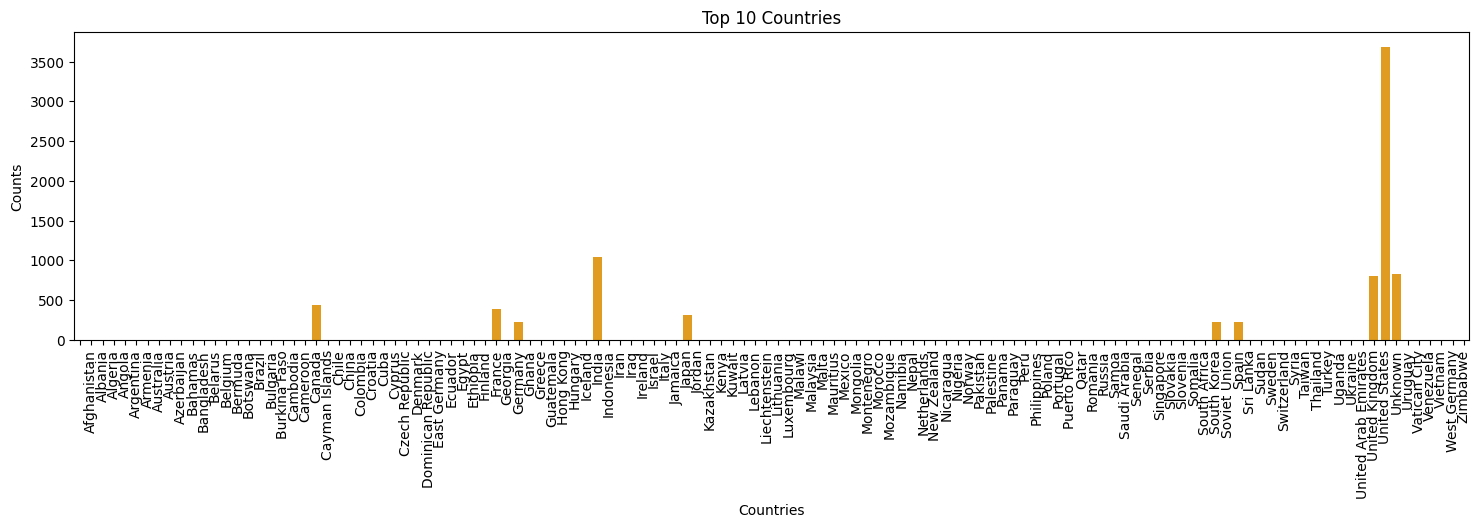

In [373]:
# How many entries are there for each country?

# Get the top 10 countries by count
top_countries = df.groupby(['country'])['title'].nunique().reset_index(name='count').sort_values('count', ascending=False).head(10)

# Plot the top 10 countries
plt.figure(figsize=(18, 4))
sns.barplot(data=top_countries, x='country', y='count', color='orange')
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.title('Top 10 Countries')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

> USA, India and UK are the top 3 in geographical distribution of content production adopted by Netflix

In [374]:
top_countries

,country,count
116,United States,3690
46,India,1046
117,Unknown,831
115,United Kingdom,806
21,Canada,445
37,France,393
54,Japan,318
103,Spain,232
101,South Korea,231
39,Germany,226


In [375]:
# How many unique values exist in each categorical column?

'''
this will give the columnwise unique values information
cast and dir_cast columns with the large numbers of the unique values

# Index and Show ID are with the max unique ids which is also necessary
# relaease year are having the 74 unique years data from 124 countries, which we can check
# 1699 dates are there when the netflix added content to the platform and 12 years where nextfix added the contnt i.e roughly every on avg 3 days content is added 
'''
df.nunique()

index            8807
show_id          8807
type                2
title            8806
date_added       1714
release_year       74
rating             17
duration          211
description      8775
director         4994
cast            36440
country           124
listed_in          42
month_added        12
year_added         14
day_added          31
dir_cast        62741
dtype: int64

In [376]:
# Few important columns with the count of unique values
df[['type', 'rating', 'country', 'listed_in', 'release_year', 'year_added']].nunique()

type              2
rating           17
country         124
listed_in        42
release_year     74
year_added       14
dtype: int64

> Our dataset has 2 types of listed program, whcih are broadly classified into 17 ratings and has wide verity of 42 genres, which are from 142 countries and collection of the movies released in 74 past years. 

In [377]:
'''
4.	Visual Analysis - Univariate, Bivariate after pre-processing of the data
(Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country)
4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)
4.2 For categorical variable(s): Boxplot (10 Points)
For correlation: Heatmaps, Pairplots (10 Points)
'''

'\n4.\tVisual Analysis - Univariate, Bivariate after pre-processing of the data\n(Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country)\n4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)\n4.2 For categorical variable(s): Boxplot (10 Points)\nFor correlation: Heatmaps, Pairplots (10 Points)\n'

# Univariate analysis

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\3317213272.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration = df.groupby(['duration', 'type'])['title'].nunique().reset_index(name = 'count')


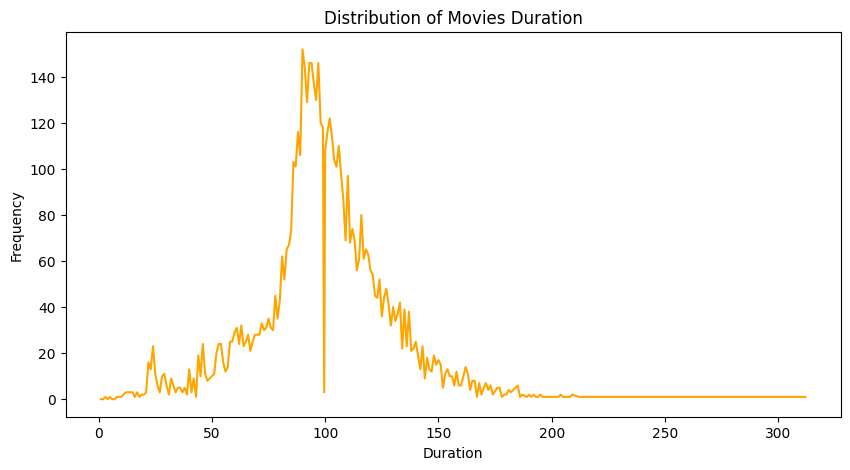

In [378]:
# Distribution Plot (lineplot) for duration with customized colors

duration = df.groupby(['duration', 'type'])['title'].nunique().reset_index(name = 'count')
duration = duration[duration['type'] == 'Movie']
plt.figure(figsize=(10, 5))
sns.lineplot(data= duration, x = 'duration', y = 'count', color = 'orange')
plt.title('Distribution of Movies Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

> Majority of the movies are having duration in teh range of 87 to 115mins long, which are mostly preffered by netflix in history.

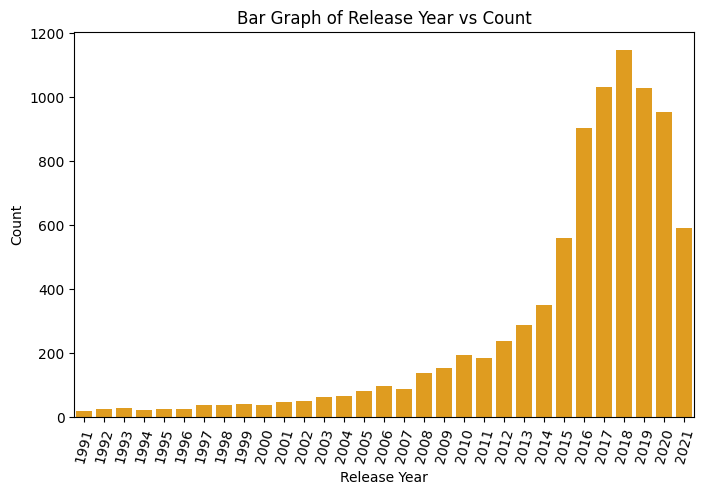

In [379]:
# Count Plot (bar plot for continuous variables)

release_year = df.groupby(['release_year'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)
release_year = release_year[release_year['release_year'] > 1990]
plt.figure(figsize=(8, 5))
sns.barplot(data = release_year, x = 'release_year', y = 'count', color='orange')
plt.title('Bar Graph of Release Year vs Count')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

> Data that we have is with the major share of programs or TV shows which are released after 2011/12 and we can see the inclining trend in addition for the content addition.

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\955435671.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_top_dir, y='director', x='count', palette='pastel')


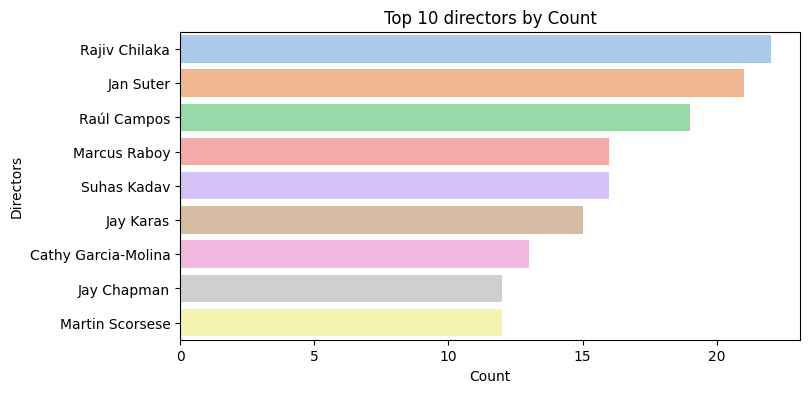

In [380]:
# Count Plot (Horizontal Bar Plot) for cast

# Filter out the rows where 'director' is 'Unknown'
filtered_top_dir = top_director[top_director['director'] != 'Unknown']

# Plotting
plt.figure(figsize=(8, 4))
sns.barplot(data=filtered_top_dir, y='director', x='count', palette='pastel')
plt.title('Top 10 directors by Count')
plt.xlabel('Count')
plt.ylabel('Directors')
plt.show()

> Rajiv Chilaka and Jan Suter are the top directors with the highest movies count

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\3003383044.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = filtered_top_cast, y='cast', x = 'count', palette='pastel')


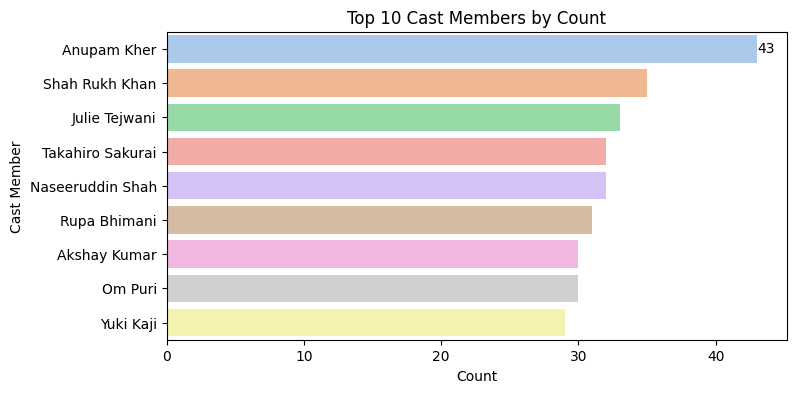

In [381]:
# Count Plot (Horizontal Bar Plot) for cast

filtered_top_cast = top_cast[top_cast['cast'] != 'Unknown']

plt.figure(figsize=(8, 4))
ax = sns.barplot(data = filtered_top_cast, y='cast', x = 'count', palette='pastel')
plt.title('Top 10 Cast Members by Count')
plt.xlabel('Count')
plt.ylabel('Cast Member')
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.show()

> Anupam Kher and Shah Rukh Khan has the highest numbers of movies/program enlisted in the netflix, which can also be considered as the most favoured cast for content addition

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\2439044067.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_rating = df.groupby(['rating'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)


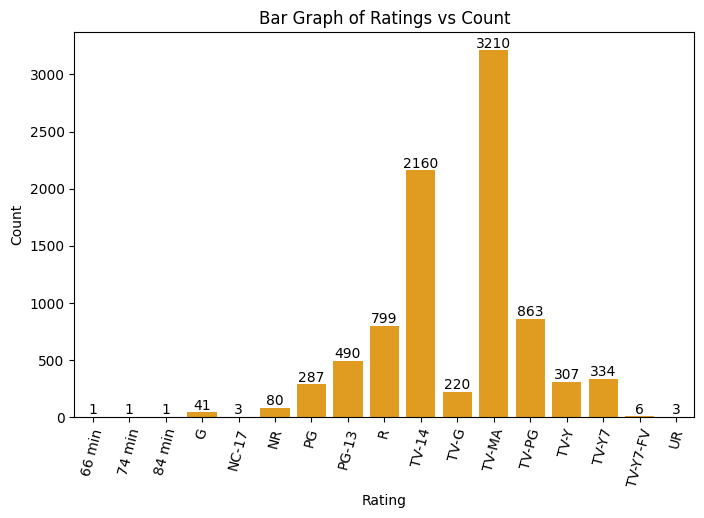

In [382]:
# Which is the most favoured criteria of the content is favoured by the Netflix to add it to the platform?
top_rating = df.groupby(['rating'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)
top_rating
plt.figure(figsize=(8, 5))
ax = sns.barplot(data = top_rating, x = 'rating', y = 'count', color='orange')
plt.title('Bar Graph of Ratings vs Count')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=75)
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.show()

> Basis the ratings of the available movies we can say that TV-MA and TV-14 are the top ratings that are favoured, which are basiscally for the >14 years age of people. 

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\3972882556.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['type'])['title'].nunique().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'), startangle=90)


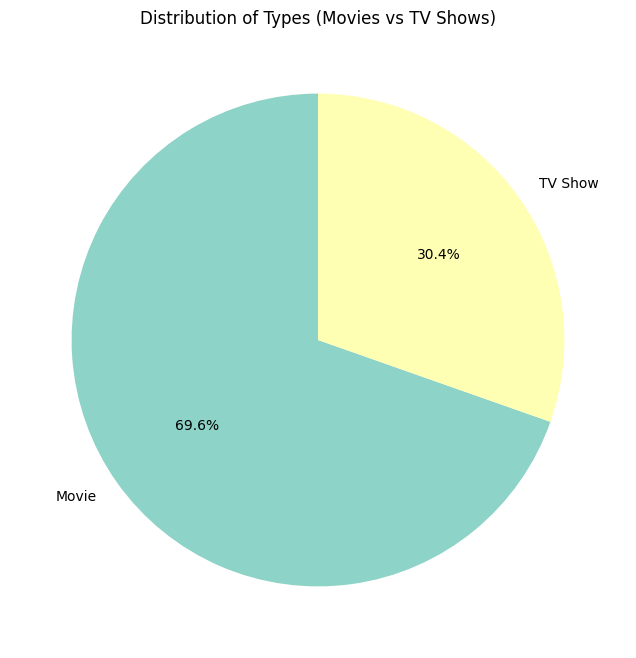

In [383]:
# Count Plot (Pie Chart) for type:

plt.figure(figsize=(8, 8))
df.groupby(['type'])['title'].nunique().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'), startangle=90)
plt.title('Distribution of Types (Movies vs TV Shows)')
plt.ylabel('')
plt.show()

> Out of total content we have 30% of TV shows and 69% of Movies, which shows movies share of in the total content is more.

# Bivariate Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


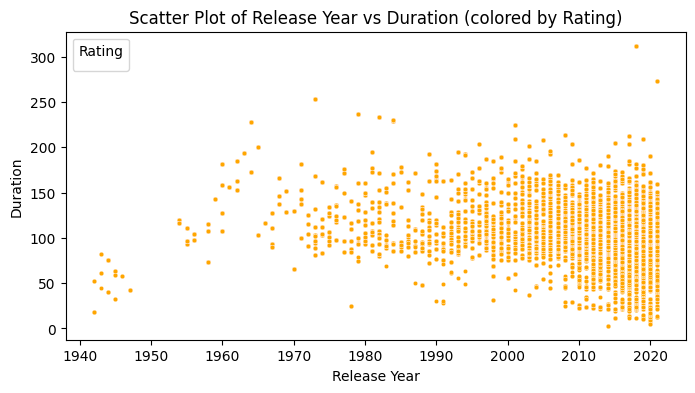

In [384]:
# Scatter plot of release_year vs duration

df1 = df[df['type'] != 'TV Show']
plt.figure(figsize=(8, 4))
sns.scatterplot(x='release_year', y='duration', data=df1, color='orange', s=10)
plt.title('Scatter Plot of Release Year vs Duration (colored by Rating)')
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.legend(title='Rating')
plt.show()

> Above graph shows the spread of the movie duration across the years, if u observe the band between 50 and 150mins most of the movies in that duration with some higher or lower than that.

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\3138176960.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='duration', data=df2, palette='muted')


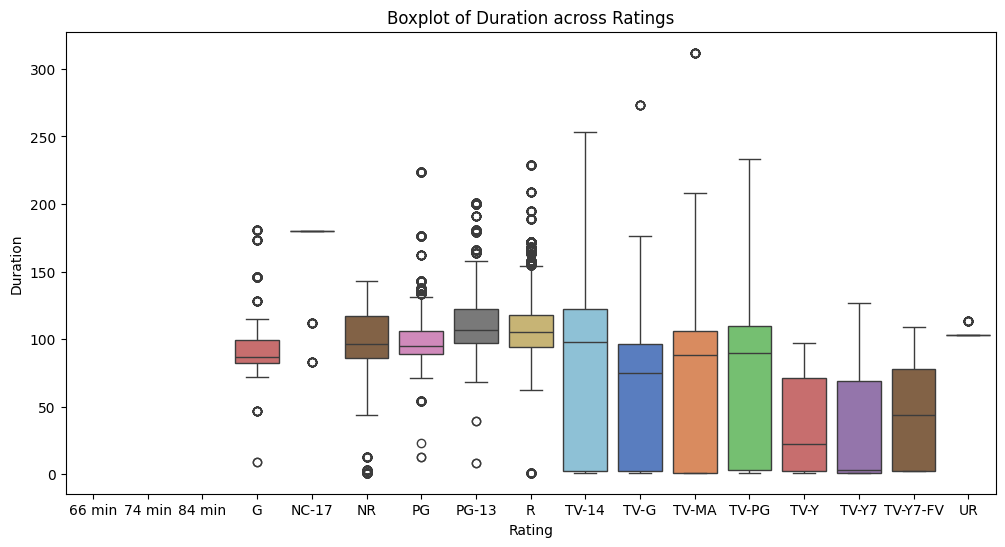

In [385]:
# Boxplot for duration across different ratings

df2 = df[~df['rating'].isin(['66 min', '74 min', '84 min'])]
release_year = df2.groupby(['release_year'])['title'].nunique().reset_index(name='count').sort_values('count', ascending=False)
plt.figure(figsize=(12, 6))
sns.boxplot(x='rating', y='duration', data=df2, palette='muted')
plt.title('Boxplot of Duration across Ratings')
plt.xlabel('Rating')
plt.ylabel('Duration')
plt.show()

> If we see the movies duration across their rating we can see that TV-14 long range in terms of duration with no outlier.

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\1860365508.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  release_year = df.groupby(['release_year', 'type'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)
C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\1860365508.py:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.barplot(data = release_year, x = 'release_year', y = 'count', hue = 'type', color='skyblue')


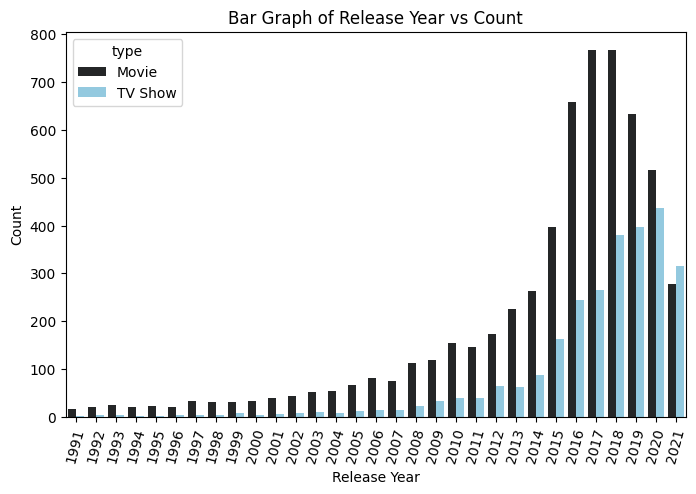

In [386]:
# Count Plot (bar plot for continuous variables)-> Bivariate
release_year = df.groupby(['release_year', 'type'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)
release_year = release_year[release_year['release_year'] > 1990]
plt.figure(figsize=(8, 5))
sns.barplot(data = release_year, x = 'release_year', y = 'count', hue = 'type', color='skyblue')
plt.title('Bar Graph of Release Year vs Count')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

> Its evident that till 2017 the addition of movies were at inclining state while after that more focus turned towards the addition of TV shows after 2017 the gap between the movies and TV shows started narrowing where movies addition compare to TV shows started declining

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\2471123030.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  No_movies_per_year = df.groupby(['release_year', 'type'])['title'].nunique().reset_index(name = 'count')


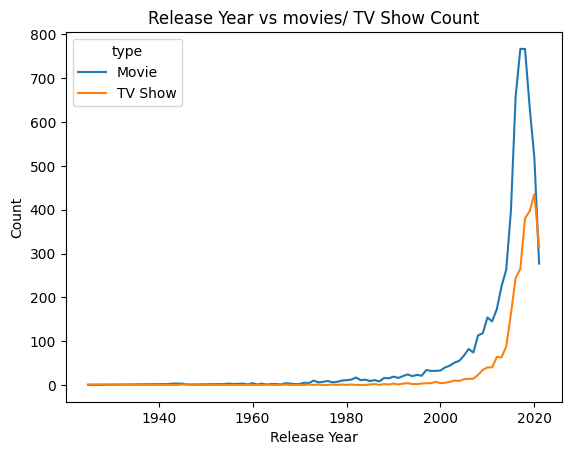

In [387]:
# No of movies/TV shows per year:
df['year_added'] = pd.to_numeric(df['year_added'], errors='coerce')
No_movies_per_year = df.groupby(['release_year', 'type'])['title'].nunique().reset_index(name = 'count')
No_movies_per_year.head()
sns.lineplot(data=No_movies_per_year, x='release_year', y='count', hue = 'type')
plt.title('Release Year vs movies/ TV Show Count')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

> Its evident that from 1940 to 2000 the trend for movie production increased significantly but after reaching to its peak it sterted declining again

> TV shows started getting attention more after 2008 onwards roghly and seen vertical growth with speed 

> There can be also one possible reason may be the data for 2021 can be incomplete so that the decline is seen in trend

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\3107700198.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  No_movies_Show_per_year = df.groupby(['release_year', 'type'])['title'].nunique().reset_index()
C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\3107700198.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  movieshows_per_year= No_movies_Show_per_year.pivot_table(index='release_year', columns = 'type').reset_index().sort_index(ascending= False)


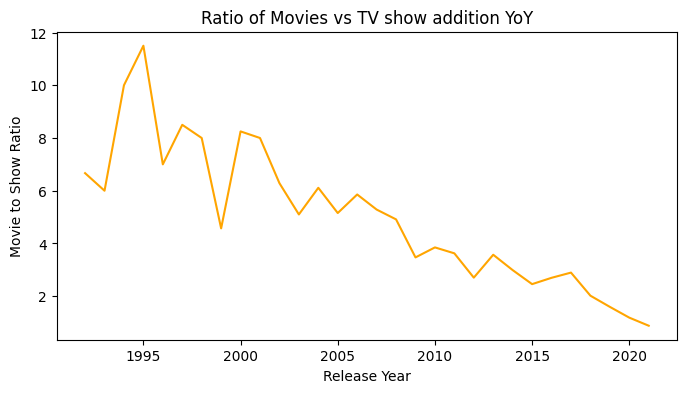

In [388]:
# Comparison of tv shows vs. movies.
No_movies_Show_per_year = df.groupby(['release_year', 'type'])['title'].nunique().reset_index()
movieshows_per_year= No_movies_Show_per_year.pivot_table(index='release_year', columns = 'type').reset_index().sort_index(ascending= False)
movieshows_per_year['movie_show_ratio'] = movieshows_per_year[('title', 'Movie')]/ movieshows_per_year[('title', 'TV Show')]
movieshows_per_year= movieshows_per_year.head(30)
plt.figure(figsize=(8, 4))
sns.lineplot(data = movieshows_per_year, x = 'release_year', y = 'movie_show_ratio', color = 'orange')
plt.title('Ratio of Movies vs TV show addition YoY')
plt.xlabel('Release Year')
plt.ylabel('Movie to Show Ratio')
plt.xticks(rotation=0)
plt.show()

> Its interesting to see that the movies vs TV shaow ratio is on declining trnd in last 30 years e.i.the no of movies produced per year are declining if we compared with the no of TV shows. TV show share is increasing vs Movies, which indicates the TV shows popularity is increasing

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\513053496.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  No_movies_per_month = df.groupby(['month_added', 'type'])['title'].nunique().reset_index(name='count')


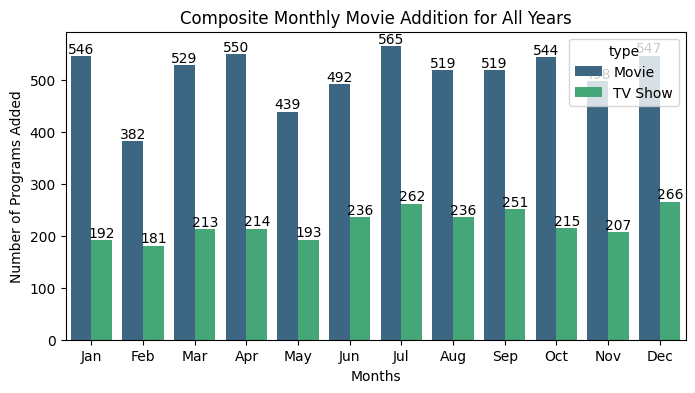

In [389]:
# Whcih month is best/popular to add movie/TV show:

# Group the data by 'month_added' and 'type', counting unique titles
No_movies_per_month = df.groupby(['month_added', 'type'])['title'].nunique().reset_index(name='count')

# Corrected the order of the months (Sep was out of order) and added 'Sep' in the correct place
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'month_added' to a categorical type with the correct order
No_movies_per_month['month_added'] = pd.Categorical(No_movies_per_month['month_added'], categories=month_order, ordered=True)

# Set the figure size
plt.figure(figsize=(8, 4))

# Create the bar plot, making sure to use the 'hue' parameter correctly
ax = sns.barplot(data=No_movies_per_month, x='month_added', y='count', hue='type', palette='viridis')

# Add labels to the bars in the plot
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

# Add titles and labels to the plot
plt.title('Composite Monthly Movie Addition for All Years')
plt.xlabel('Months')
plt.ylabel('Number of Programs Added')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the plot
plt.show()

> Using above table we can generally tell that the conntetn addition is majorly done in Jul months followed by Dec

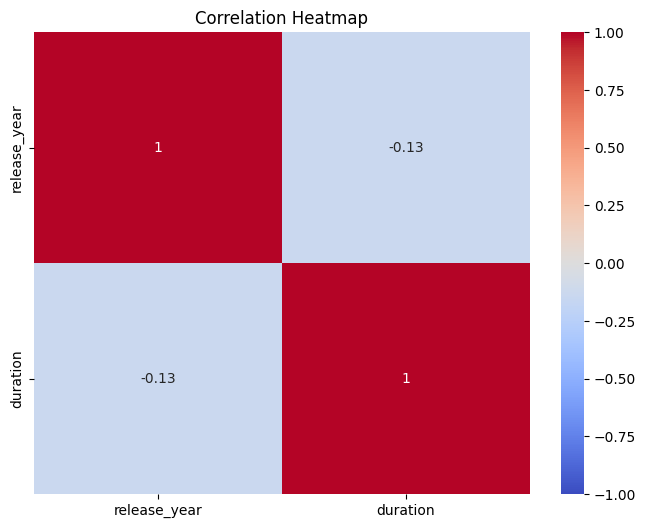

In [390]:
# Selecting numerical variables for correlation analysis
corr = df.groupby(['release_year', 'duration'])['title'].nunique().reset_index()
numerical_vars = ['release_year', 'duration']

# Create a correlation matrix
corr_matrix = corr[numerical_vars].corr()

# Plotting heatmap of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\chavad\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\chavad\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\chavad\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\chavad\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)


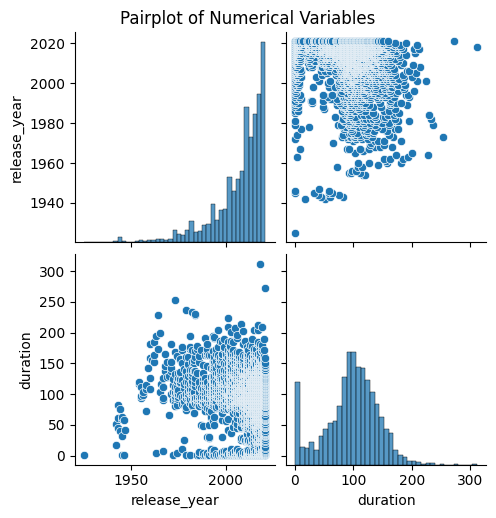

In [391]:
# Plotting pairplot for numerical variables
sns.pairplot(corr[numerical_vars], diag_kind='hist', kind='scatter', palette='husl')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

'\npointing the movie duration has one outlier having duration >300mins.\n'

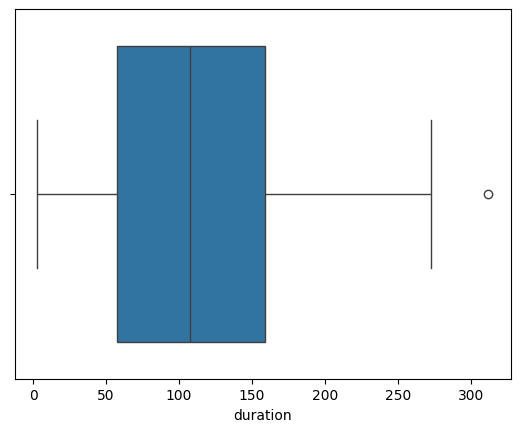

In [393]:
# Outlier Detection:

# Using Box Plot

m = movies.groupby('duration')['title'].unique().to_frame().reset_index()

sns.boxplot( data = m, x = 'duration')

'''
pointing the movie duration has one outlier having duration >300mins.
'''

In [394]:
# Outlier detection Using the function:

'''
As expecte outcome from the box plot indicating the outlier greater than 300mins and using calculations 

we can see the oulier values = 312 mins, which is proving the points for each other.

Results for both the calculations like boxplot and using formula are pointing same thing of the Outlier that is falling as movie which is having length = 312mins,

which we have already guessed visually using box plot and calculated with the formula

'''

# Calculate IQR
Q1 = m['duration'].quantile(0.25)
Q3 = m['duration'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = m[(m['duration'] < lower_bound) | (m['duration'] > upper_bound)]

outliers_iqr

,duration,title
205,312.0,[Black Mirror: Bandersnatch]


In [395]:
'''
6.1 Comments on the Range of Attributes

Countries:
o	The dataset includes content from a wide range of countries, emphasizing its international appeal.
'''

'\n6.1 Comments on the Range of Attributes\n\nCountries:\no\tThe dataset includes content from a wide range of countries, emphasizing its international appeal.\n'

In [396]:
'''Release Year: '''

min_year= min(df['release_year']) 
max_year = max(df['release_year'])

print(f"Data of release year ranges from {min_year} to {max_year} TV show and movies ")

Data of release year ranges from 1925 to 2021 TV show and movies 


C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\2471123030.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  No_movies_per_year = df.groupby(['release_year', 'type'])['title'].nunique().reset_index(name = 'count')


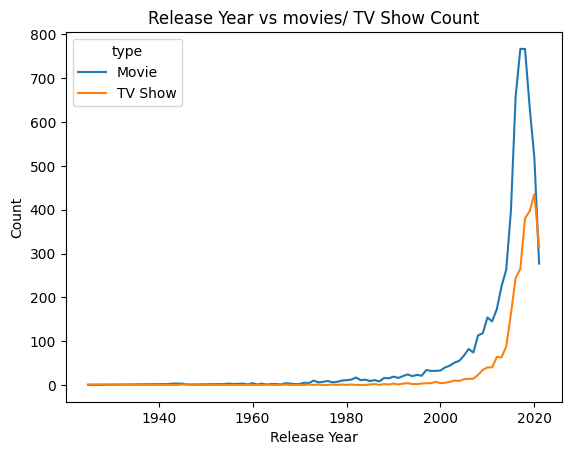

In [397]:
# No of movies/TV shows per year:
df['year_added'] = pd.to_numeric(df['year_added'], errors='coerce')
No_movies_per_year = df.groupby(['release_year', 'type'])['title'].nunique().reset_index(name = 'count')
No_movies_per_year.head()
sns.lineplot(data=No_movies_per_year, x='release_year', y='count', hue = 'type')
plt.title('Release Year vs movies/ TV Show Count')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

> Its evident that from 1940 to 2000 the trend for movie production increased significantly but after reaching to its peak it sterted declining again

> TV shows started getting attention more after 2008 onwards roghly and seen vertical growth with speed There can be also one possible reason may be the data for 2021 can be incomplete so that the decline is seen in trend

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\478326750.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_tv = df.groupby(['duration', 'type'])['title'].nunique().reset_index(name = 'count')


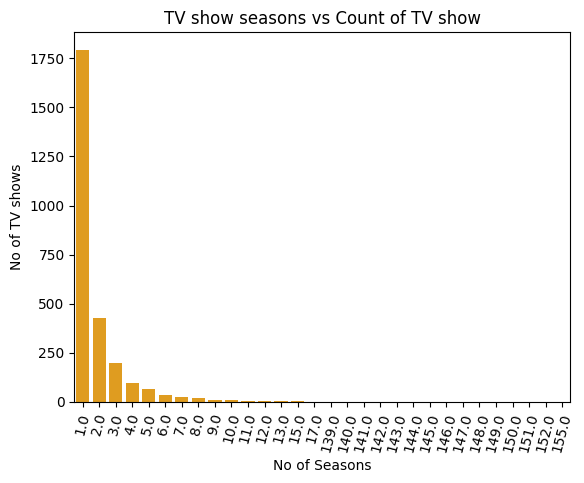

In [398]:
'''Duration Comments:'''

duration_tv = df.groupby(['duration', 'type'])['title'].nunique().reset_index(name = 'count')
duration_tv = duration_tv[duration_tv['type'] == 'TV Show']
d = duration_tv.sort_values('count', ascending = False).head(30)
sns.barplot(data = d, x = 'duration', y = 'count', color = 'orange')
plt.title('TV show seasons vs Count of TV show')
plt.xlabel('No of Seasons')
plt.ylabel('No of TV shows')
plt.xticks(rotation=75)
plt.show()
# Majority of having 1 season only, while few also ranges till 15 to 16 seasons as visually we can see.

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\3353212124.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration = df.groupby(['duration', 'type'])['title'].nunique().reset_index(name = 'count')


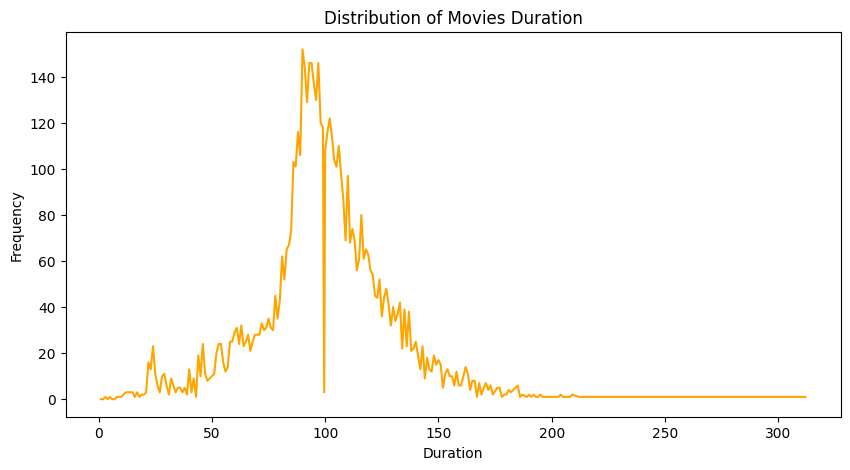

In [399]:
duration = df.groupby(['duration', 'type'])['title'].nunique().reset_index(name = 'count')
duration = duration[duration['type'] == 'Movie']
plt.figure(figsize=(10, 5))
sns.lineplot(data= duration, x = 'duration', y = 'count', color = 'orange')
plt.title('Distribution of Movies Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

> Majority of the movies are having duration in teh range of 87 to 115mins long, which are mostly preffered by netflix in history.

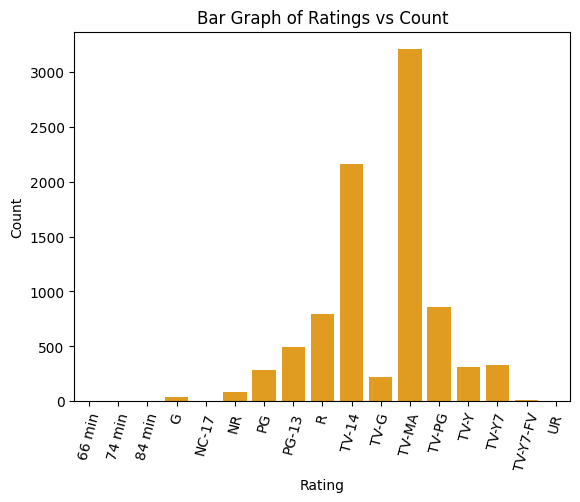

In [400]:
'''Rating Comments:'''
sns.barplot(data = top_rating, x = 'rating', y = 'count', color='orange')
plt.title('Bar Graph of Ratings vs Count')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

# Observation: 

1. Given plot for the rating distribution is enlightening us on the majority ratings that shows are having (For movies and TV shows both).

2. Majority shows are of: TV-MA and TV-14 i.e programs that are intended for >14 years 
    * TV-MA--> intended for mature audience >17 years for television show
    * tv-14--> programs that are unsuitable for children <14years
    * tv-pg-->program contains material that parents may find unsuitable for younger children.
    * r    --> unsuitable for <17 years

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\2270947038.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_genre = df.groupby(['listed_in', 'type'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)


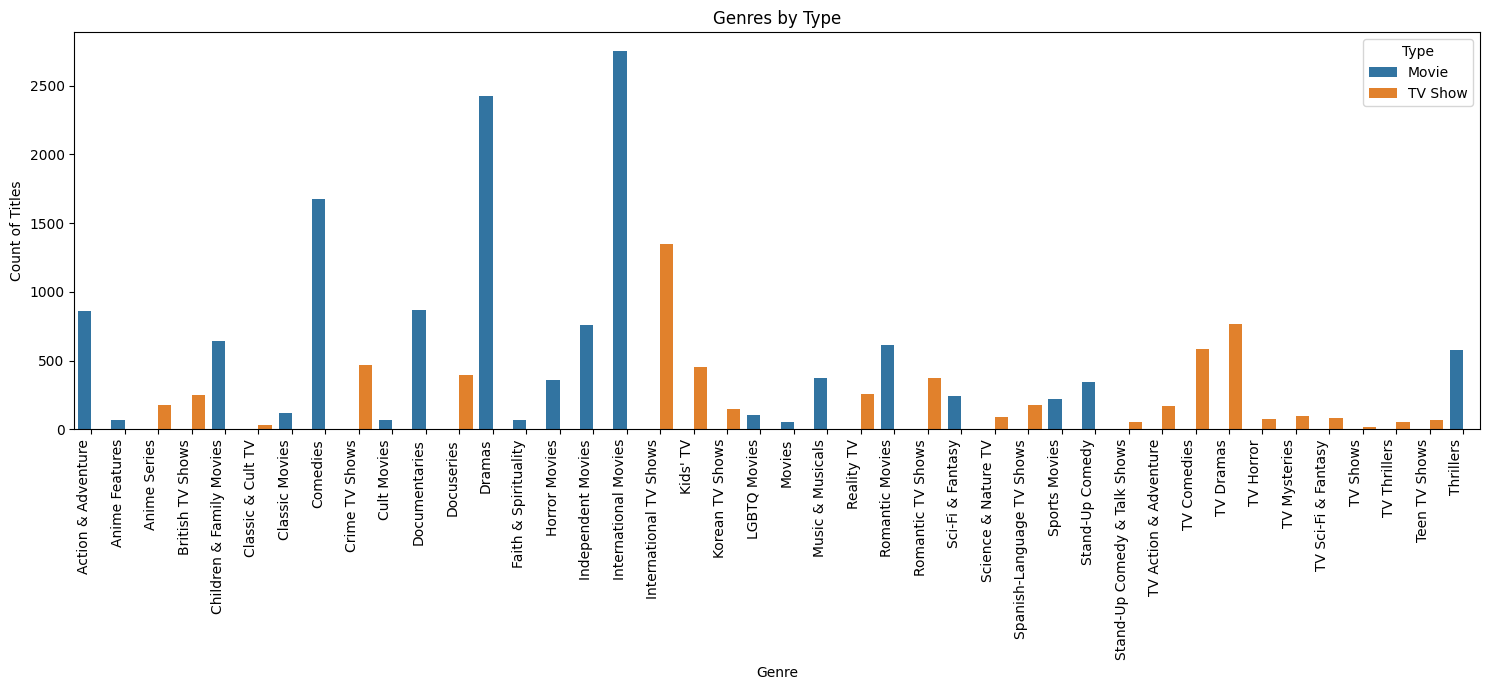

In [401]:
# Genres by type of content
top_10_genre = df.groupby(['listed_in', 'type'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)
plt.figure(figsize=(15, 7))
sns.barplot(data=top_10_genre, x='listed_in', y='count', hue = 'type')
plt.title('Genres by Type')
plt.xlabel('Genre')
plt.ylabel('Count of Titles')
plt.xticks(rotation=90, ha='right')  # Adjust rotation for better readability
plt.legend(title='Type')
plt.tight_layout()
plt.show()

> International Movie, Dramas and Comedy genres are top in number of contents of TV show and Movies in both the type.

# Comments on the Range of Attributes

*  Release Year:

    -  The release_year attribute covers a broad range of years from 1925 to 2021, encompassing both older and more recent releases.
    -  A significant portion of the content has been released in the last few years, indicating that Netflix is continually expanding its library with new releases.

*  Duration:

    -  Movies:
    The duration for movies varies from short films to full-length films.
    The majority of movie durations fall within the typical feature film length of 90-120 minutes, highlighting a focus on standard movie formats.

    -  TV Shows:
    The duration for TV shows is represented by the number of seasons, which provides insight into the series' length but not individual episode durations.
    modal value for the most of the shows are 1 season.

*  Rating/Genres:

    - The rating attribute showcases a wide range of audience classifications and verity of content available, ratings including "G" (General Audiences) to "NC-17" (Adults Only) and genres from Drama to International Shows,
    - But most of the shows fall under the TV-14 and TV-MA in terms of ratings and most favoured genres are International show followed by dramas followed by comedy.
    - This variety ensures that Netflix offers content suitable for different age groups and preferences, catering to a diverse audience.

*  Geographic variability in content
    -  Netflix has the varity of content available from around 140+ countries, which helps in keeping global appeal in terms of viewing experience and culturally diverse content to appeal world wide audience.

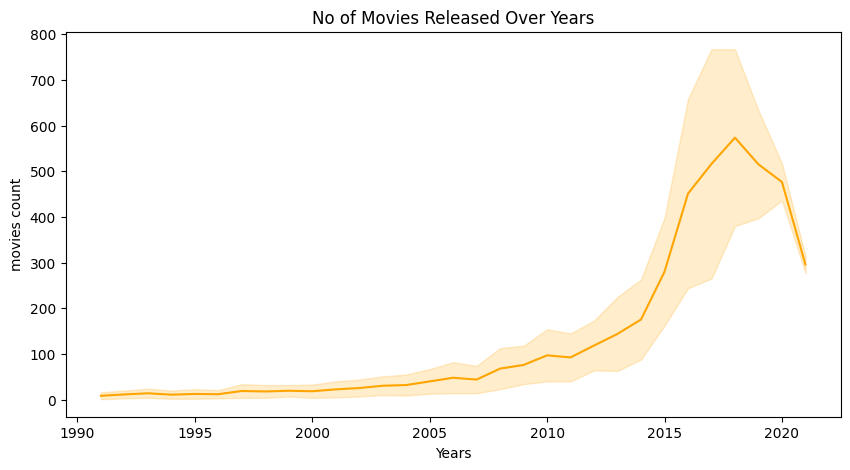

In [403]:
rele_yr = df.groupby(['release_year'])['title'].nunique().reset_index(name = 'count')
plt.figure(figsize=(10, 5))
sns.lineplot(data= release_year, x = 'release_year', y = 'count', color = 'orange')
plt.title('No of Movies Released Over Years')
plt.xlabel('Years')
plt.ylabel('movies count')
plt.show()

> Distribution of Release Year:
    - The release year distribution is left-skewed, with a noticeable increase in content production in recent years.


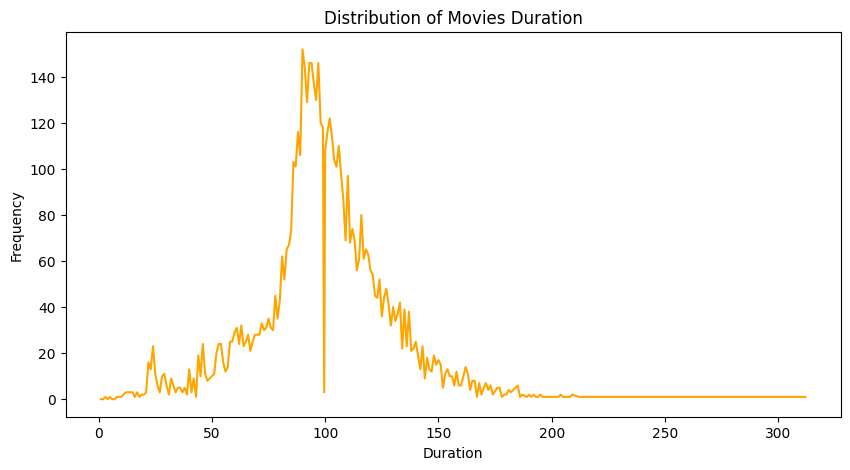

In [404]:
plt.figure(figsize=(10, 5))
sns.lineplot(data= duration, x = 'duration', y = 'count', color = 'orange')
plt.title('Distribution of Movies Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

> Distribution of Duration: The duration of movies typically falls within the 90-120 minute range. Outliers include very short and very long films, suggesting a few documentaries or specials.

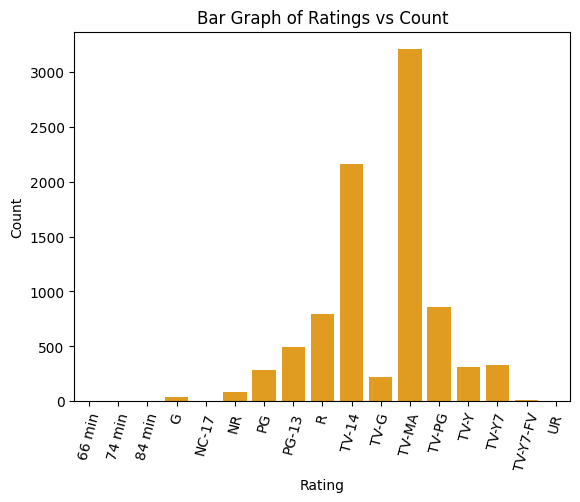

In [405]:
sns.barplot(data = top_rating, x = 'rating', y = 'count', color='orange')
plt.title('Bar Graph of Ratings vs Count')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

> Distribution of Ratings: The countplot for ratings shows that TV-MA (Mature Audience) is the most common rating, reflecting a significant amount of content targeted at adults. The platform also has a substantial amount of content rated TV-14, indicating a focus on teenage and adult audiences.

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\1448635016.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_10_genre = df.groupby(['listed_in', 'type'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)


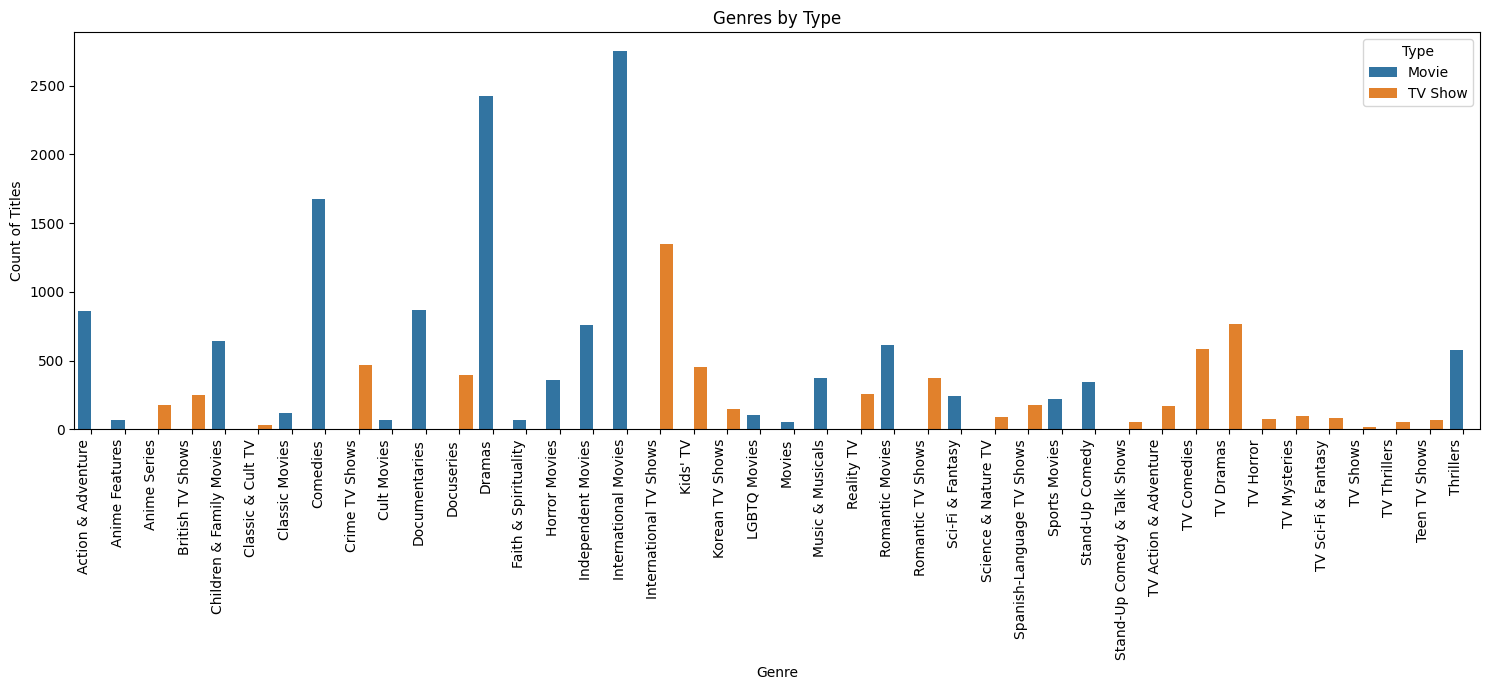

In [406]:
'''
Genres Distribution:
Certain genres like International TV Shows, dramas and comedies are highly represented, indicating the platform's focus on diverse and entertaining content provision.
'''
top_10_genre = df.groupby(['listed_in', 'type'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)
plt.figure(figsize=(15, 7))
sns.barplot(data=top_10_genre, x='listed_in', y='count', hue = 'type')
plt.title('Genres by Type')
plt.xlabel('Genre')
plt.ylabel('Count of Titles')
plt.xticks(rotation=90, ha='right')  # Adjust rotation for better readability
plt.legend(title='Type')
plt.tight_layout()
plt.show()

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\22020960.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titles_added_per_month = df.groupby(['year_added', 'month_added']).size().reset_index(name='titles_added')


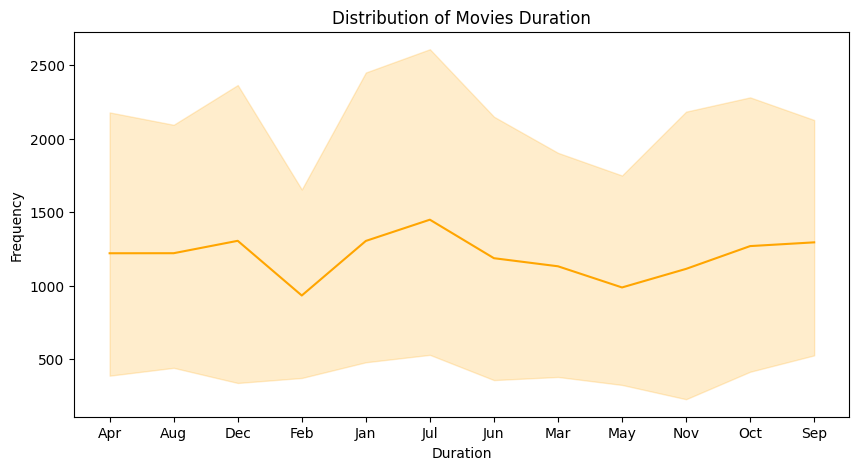

In [407]:
titles_added_per_month = df.groupby(['year_added', 'month_added']).size().reset_index(name='titles_added')
titles_added_per_month.sort_values('titles_added', ascending = False)
plt.figure(figsize=(10, 5))
sns.lineplot(data= titles_added_per_month, x = 'month_added', y = 'titles_added', color = 'orange')
plt.title('Distribution of Movies Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()


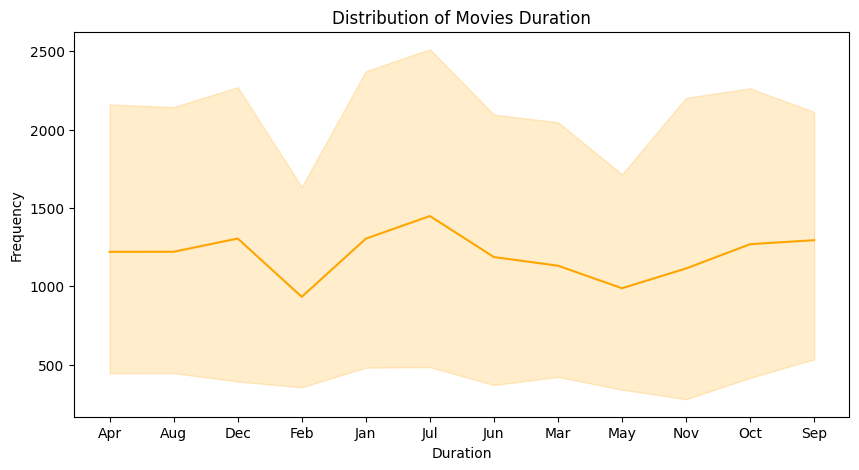

In [408]:
movies_addition = titles_added_per_month.sort_values(by=['year_added', 'month_added'])
plt.figure(figsize=(10, 5))
sns.lineplot(data= movies_addition, x = 'month_added', y = 'titles_added', color = 'orange')
plt.title('Distribution of Movies Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

* Few KPI's that we can track to get the insights:

1. Percent movies per TV shows
2. Top Genre (count wise)
3. Major Contributing Country
4. Per Year Movies Release
5. International Vs domestic content

In [409]:
# 1. Percent movies per TV shows:

movieshows = df.groupby(['type'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)
movies_per_show = movieshows.loc[1, 'count']/movieshows.loc[0, 'count']
print(f"The shows to movie ratio pointing that the rate of movies addidition is {round(movies_per_show,2)} vs the rate of movies additions.")

The shows to movie ratio pointing that the rate of movies addidition is 0.44 vs the rate of movies additions.


C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\2914922760.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  movieshows = df.groupby(['type'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)


In [410]:
# 2.Top Genre (count wise)

gnre = df.groupby(['listed_in'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)
gnre = gnre.head(1)
gnre

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\909156570.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gnre = df.groupby(['listed_in'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)


,listed_in,count
16,International Movies,2751


In [411]:
# 3.Major Contributing Country
cntry = df.groupby(['country'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)
cntry = cntry.head(1)
cntry

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\2573820432.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cntry = df.groupby(['country'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)


,country,count
116,United States,3690


In [412]:
# 4. Year wise movie releases top 3 years
rele_yr = df.groupby(['release_year'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)
top_3_rele_yr = rele_yr.head(3)
top_3_rele_yr

,release_year,count
70,2018,1147
69,2017,1032
71,2019,1030


In [413]:
# 5.International Vs domestic content

dom = df[df['country'] == 'United States']
Domestic = dom.groupby(['country'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)

intr = df[df['country'] != 'United States']
International = intr.groupby(['country'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)

International['count'].sum()/Domestic['count'].sum()

C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\1268077364.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Domestic = dom.groupby(['country'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)
C:\Users\chavad\AppData\Local\Temp\ipykernel_5320\1268077364.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  International = intr.groupby(['country'])['title'].nunique().reset_index(name = 'count').sort_values('count', ascending= False)


1.9387533875338754

# Business Insights

1. Year on Year content release shows that platforms library is growing  and when we compare that with the type, its seen that more focus diverted to shows than movies in recent year.
2. Ideal duration of movies are majorly lying in the range of 90 mins to 120 mins, so we can prefer to addd content in this range.
3. Plot on ratings indicates that TV-MA is the most frequent rating, showing the platform's focus on mature content.Ratings like G and PG have fewer entries,
   suggesting less content aimed solely at younger audiences.
4. The heatmap reveals weak correlations among numerical variables, suggesting that variables like release_year and duration are relatively independent of each other. 
   The weak correlations indicate that other factors (like genre or audience preference) might play a larger role in determining content characteristics.
5. No clear trends observed in pairplot.

# Suggestions/Recomendations:

1. No of movies addition trend seems to be declining from the 2016 while the trend for the movie shows addition has increased, which is showing focused approach towards the addition of shows vs movies while that surpassed no of movies added vs TV shows in 2021.

2. If we study the movies/shows carefully we can see the clear focus on the TV-MA and TV-14 type of content targeting teenage and adults for the content consumptions. Also Netflix has very low penetration for the below 13 years age content which Netflix can add more considering the children as next targets.

3. General movies length is ideally between 90 to 120mins which has clearly indicating that to careful while producing movie in the range of 90mins to 120mins, which will not make it too short or too lengthy.

4. Netflix can also target to cater the content in the genre segments of international movies, dramas and comedies.

5. Last 30 years its evident that movies addition to tv shows addition ratio is consistently falling, with indicating the Netflix increased focus towards the shows over the movies.

6. If we see the till date released movies/shows July is most favored for the release of movies/shows both, as that is the summer holiday time also has the independence day for US in July which makes it most favored time to release movies to increase the views.